<a href="https://colab.research.google.com/github/Rojan116/NepaliHandWrittenAlphabetRecognizer/blob/master/final%20model%201%20for%20two%20catagory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Rojan116/NepaliHandWrittenAlphabetRecognizer.git

Cloning into 'NepaliHandWrittenAlphabetRecognizer'...
remote: Enumerating objects: 8041, done.
remote: Counting objects: 100% (8041/8041), done.
remote: Compressing objects: 100% (8005/8005), done.
remote: Total 105572 (delta 172), reused 7883 (delta 35), pack-reused 97531
Receiving objects: 100% (105572/105572), 140.10 MiB | 24.76 MiB/s, done.
Resolving deltas: 100% (1722/1722), done.
Checking out files: 100% (106176/106176), done.


In [2]:
ls

NepaliHandWrittenAlphabetRecognizer/  sample_data/


In [3]:
cd NepaliHandWrittenAlphabetRecognizer

/content/NepaliHandWrittenAlphabetRecognizer


In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tqdm import tqdm
import random
from keras.utils import to_categorical




Using TensorFlow backend.


In [0]:
#%matplotlib.inline 

PATH = os.getcwd()
DATADIR = PATH + '/dhrcdata/Train'		
train_data_path = PATH + '/dhrcdata/Train'
test_data_path = PATH + '/dhrcdata/Test'


In [0]:


CATEGORIES = [

"character_1_ka","character_2_kha","character_3_ga","character_4_gha","character_5_kna",
"character_6_cha","character_7_chha","character_8_ja","character_9_jha","character_10_yna",
"character_11_taamatar","character_12_thaa","character_13_daa","character_14_dhaa","character_15_adna",
"character_16_tabala","character_17_tha","character_18_da","character_19_dha","character_20_na","character_21_pa",
"character_22_pha","character_23_ba","character_24_bha","character_25_ma","character_26_yaw","character_27_ra",
"character_28_la","character_29_waw","character_30_motosaw","character_31_petchiryakha","character_32_patalosaw",
"character_33_ha","character_34_chhya","character_35_tra","character_36_gya","digit_0","digit_1","digit_2","digit_3",
"digit_4","digit_5","digit_6","digit_7","digit_8","digit_9"

]


In [0]:

IMG_SIZE = 32
training_data = []
testing_data = []

def create_training_data():
  for catagory in CATEGORIES:
    path = os.path.join(train_data_path, catagory)
    class_num = CATEGORIES.index(catagory)
    for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
          training_data.append([new_array,class_num])
        except Exception as e:
          pass



def create_testing_data():
  for catagory in CATEGORIES:
    path = os.path.join(test_data_path, catagory)
    class_num = CATEGORIES.index(catagory)
    for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
          testing_data.append([new_array,class_num])
        except Exception as e:
          pass



create_training_data()
create_testing_data()



In [0]:
#for histogram
num_class = [i for i in range(47)]
counts = []
def count_image_in_class():
  for catagory in CATEGORIES:
    path = os.path.join(train_data_path, catagory)
    class_num = CATEGORIES.index(catagory)
    for i in range(47):
      y = 0
      for img in os.listdir(path):
        y= y+1
      counts.append(y)  
        
  count = np.array(counts)
  #print(count)
count_image_in_class()



In [9]:
listofzeros = [0] * 5
print(listofzeros)

[0, 0, 0, 0, 0]


In [0]:
#shuffle training data for trainning diff image set in every batch
random.shuffle(training_data)

#hot encode image dataset

train_x = []
train_y = []
test_x = []
test_y = []



#seperating features and labels from list
for features, labels in training_data:
	train_x.append(features)
	train_y.append(labels)

for features, labels in testing_data:
	test_x.append(features)
	test_y.append(labels)


#converting list to array
train_y_array = np.array(train_y)
test_y_array = np.array(test_y)

#converting image dataset to input 32*32 dataset 

train_image_array = np.array(train_x).reshape(-1,32,32,1)
test_image_array = np.array(test_x).reshape(-1,32,32,1)


#one hot enoded class 
train_y = to_categorical(train_y_array)
test_y = to_categorical(test_y_array)


train_y = np.array(train_y)
test_y = np.array(test_y)

#all train x, y and test x y are in array form now



In [11]:

#now creating our model

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

model = Sequential()

model.add(InputLayer(input_shape=(32,32,1)))
model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same', activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=32,kernel_size=3,strides=1,padding='same', activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

# model.add(Conv2D(filters=80,kernel_size=3,strides=1,padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))




model.add(Dense(46,activation='softmax'))
optimizer = Adam(lr=1e-3)

model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=train_image_array,y=train_y,epochs=30,batch_size=100, validation_split=0.3)

model.summary()



W0801 14:41:20.004565 140423858075520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0801 14:41:20.049831 140423858075520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 14:41:20.062256 140423858075520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0801 14:41:20.111235 140423858075520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0801 14:41:20.148185 140423858075520 deprecation_wrapp

Train on 54740 samples, validate on 23460 samples
Epoch 1/30
54740/54740 [==============================] - 22s 399us/step - loss: 2.4219 - acc: 0.3353 - val_loss: 0.7671 - val_acc: 0.7581
Epoch 2/30
54740/54740 [==============================] - 15s 278us/step - loss: 0.8062 - acc: 0.7434 - val_loss: 0.4015 - val_acc: 0.8713
Epoch 3/30
54740/54740 [==============================] - 15s 277us/step - loss: 0.5226 - acc: 0.8337 - val_loss: 0.2508 - val_acc: 0.9205
Epoch 4/30
54740/54740 [==============================] - 15s 278us/step - loss: 0.4003 - acc: 0.8739 - val_loss: 0.2070 - val_acc: 0.9357
Epoch 5/30
54740/54740 [==============================] - 15s 275us/step - loss: 0.3311 - acc: 0.8958 - val_loss: 0.1672 - val_acc: 0.9472
Epoch 6/30
54740/54740 [==============================] - 15s 279us/step - loss: 0.2913 - acc: 0.9091 - val_loss: 0.1555 - val_acc: 0.9529
Epoch 7/30
54740/54740 [==============================] - 15s 278us/step - loss: 0.2573 - acc: 0.9186 - val_loss: 0.

In [0]:
model.save('androidtest_model.h5')
model.save_weights('androidtest_weights.h5')


In [15]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

In [17]:
#new model

# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(46, activation = "softmax"))

# Define the optimizer
#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
optimizer = Adam(lr=0.0001)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [18]:
history = model.fit(x=train_image_array,y=train_y,epochs=20,batch_size=100, validation_split=0.3)

Train on 54740 samples, validate on 23460 samples
Epoch 1/20
54740/54740 [==============================] - 21s 388us/step - loss: 4.6175 - acc: 0.0936 - val_loss: 2.2990 - val_acc: 0.4920
Epoch 2/20
54740/54740 [==============================] - 20s 371us/step - loss: 1.9019 - acc: 0.4720 - val_loss: 0.6827 - val_acc: 0.8283
Epoch 3/20
54740/54740 [==============================] - 20s 363us/step - loss: 1.0472 - acc: 0.6931 - val_loss: 0.3728 - val_acc: 0.8985
Epoch 4/20
54740/54740 [==============================] - 20s 363us/step - loss: 0.7268 - acc: 0.7850 - val_loss: 0.2571 - val_acc: 0.9279
Epoch 5/20
54740/54740 [==============================] - 20s 365us/step - loss: 0.5530 - acc: 0.8343 - val_loss: 0.1957 - val_acc: 0.9434
Epoch 6/20
54740/54740 [==============================] - 20s 367us/step - loss: 0.4402 - acc: 0.8666 - val_loss: 0.1560 - val_acc: 0.9547
Epoch 7/20
54740/54740 [==============================] - 20s 368us/step - loss: 0.3666 - acc: 0.8882 - val_loss: 0.

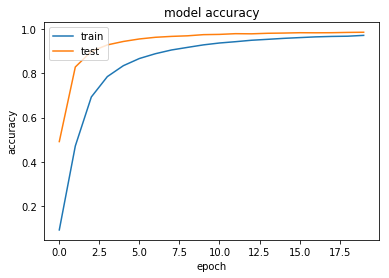

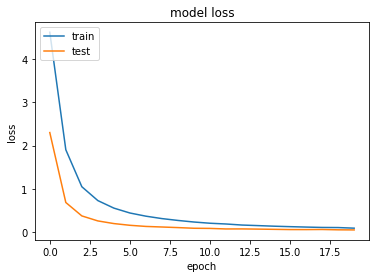

In [19]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.save("model2.h5")

In [22]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model_file( 'model2.h5' ) # Your model's name
model = converter.convert()
file = open( 'model2.tflite' , 'wb' ) 
file.write( model )

W0801 14:59:12.314235 140423858075520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/lite/python/util.py:238: convert_variables_to_constants (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
W0801 14:59:12.315881 140423858075520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/graph_util_impl.py:270: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


4572956